# Noise Eliminator

## Table of Contents

- [Noise Eliminator](#noise-eliminator)
  - [Table of Contents](#table-of-contents)
  - [Import Libraries](#import-libraries)
  - [Read Audio File](#read-audio-file)
    - [Plot the audio signal](#plot-the-audio-signal)
  - [Fourier Transform of The Audio Signal](#fourier-transform-of-the-audio-signal)
    - [Plot the fourier transform of the audio signal](#plot-the-fourier-transform-of-the-audio-signal)
  - [Eliminate Noise](#eliminate-noise)
  - [Inverse Fourier Transform](#inverse-fourier-transform)
  - [Compare Noisy and Clean Signals](#compare-noisy-and-clean-signals)
  - [Change Audio Speed](#change-audio-speed)
    - [Inverse fourier transform of the changed speed audio](#inverse-fourier-transform-of-the-changed-speed-audio)
    - [Plot the comparison of the changed speed audio](#plot-the-comparison-of-the-changed-speed-audio)
  - [Spectrogram](#spectrogram)
    - [Plot the 2D-spectrogram](#plot-the-2d-spectrogram)
  - [Write Signal to File](#write-signal-to-file)

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Read Audio File

In [3]:
sample_rate, data = scipy.io.wavfile.read('noisy_tlou.wav')
length = data.shape[0] / sample_rate
print(f'length = {length}s')
time = np.linspace(0, length, data.shape[0])

length = 51.06585034013605s


### Plot the audio signal

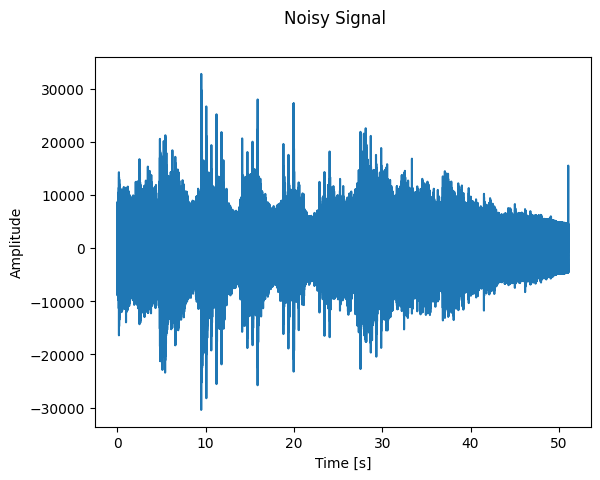

In [4]:
def plot_signal(time, data, title):
    fig, ax = plt.subplots()
    ax.plot(time, data)
    ax.set(xlabel='Time [s]', ylabel='Amplitude')
    fig.suptitle(title)

plot_signal(time, data, 'Noisy Signal')

## Fourier Transform of The Audio Signal

In [5]:
fourier = np.fft.fft(data)
freq = np.fft.fftfreq(data.shape[0], 1/sample_rate)

### Plot the fourier transform of the audio signal

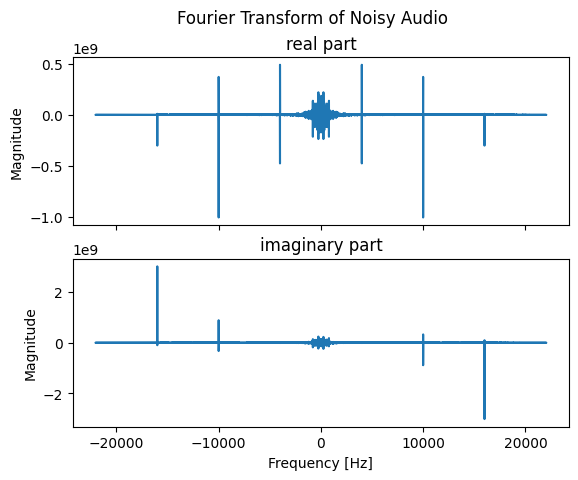

In [6]:
def plot_fft(fourier, freq, title):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.suptitle(title)
    ax1.plot(freq, fourier.real)
    ax1.set_title('real part')
    ax2.plot(freq, fourier.imag)
    ax2.set_title('imaginary part')
    for ax in fig.get_axes():
        ax.set(xlabel='Frequency [Hz]', ylabel='Magnitude')
        ax.label_outer()

plot_fft(fourier, freq, 'Fourier Transform of Noisy Audio')

## Eliminate Noise

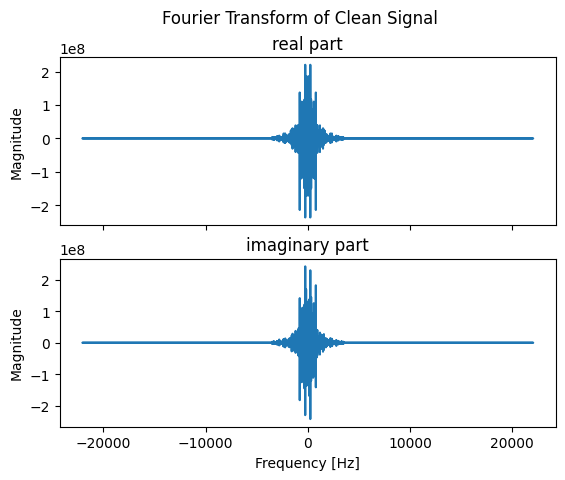

In [7]:
def eliminate_frequency(fourier, freq, lower_bound, upper_bound):
    fourier[np.where((freq > lower_bound) & (freq < upper_bound))] = 0

clean_fourier = fourier.copy()
eliminate_frequency(clean_fourier, freq, -20000, -3500)
eliminate_frequency(clean_fourier, freq, 3500, 20000)
plot_fft(clean_fourier, freq, 'Fourier Transform of Clean Signal')

## Inverse Fourier Transform

C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


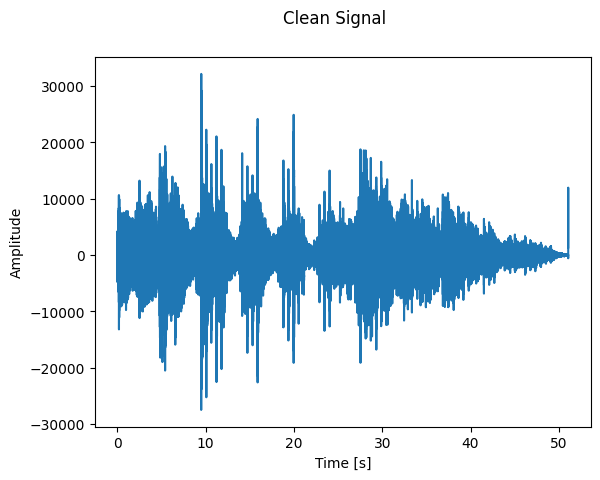

In [8]:
clean_signal = np.fft.ifft(clean_fourier)
plot_signal(time, clean_signal, 'Clean Signal')

## Compare Noisy and Clean Signals

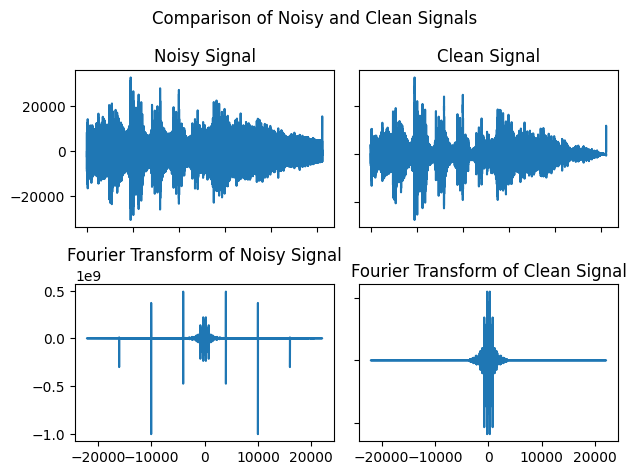

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Comparison of Noisy and Clean Signals')
ax1.plot(time, data)
ax1.set_title('Noisy Signal')
ax2.plot(time, clean_signal)
ax2.set_title('Clean Signal')
ax3.plot(freq, fourier.real)
ax3.set_title('Fourier Transform of Noisy Signal')
ax4.plot(freq, clean_fourier.real)
ax4.set_title('Fourier Transform of Clean Signal')
for ax1 in fig.get_axes():
    ax1.label_outer()
fig.tight_layout()

## Change Audio Speed

In [10]:
fast_fourier = np.zeros(fourier.shape, dtype=fourier.dtype)
slow_fourier = np.zeros(fourier.shape[0] * 2, dtype=fourier.dtype)
slow_freq = np.fft.fftfreq(slow_fourier.shape[0], 1/sample_rate)
for i in range(clean_fourier.shape[0] // 4):
    fast_fourier[i * 2] = clean_fourier[i]
    fast_fourier[-1 - i * 2] = clean_fourier[-1 - i]
    slow_fourier[i] = clean_fourier[i * 2]
    slow_fourier[-1 - i] = clean_fourier[-1 - i * 2]
fast_fourier /= 2
slow_fourier /= 0.5

### Inverse fourier transform of the changed speed audio

In [11]:
fast_signal = np.fft.ifft(fast_fourier)[:time.shape[0] // 2]
slow_signal = np.fft.ifft(slow_fourier)

### Plot the comparison of the changed speed audio

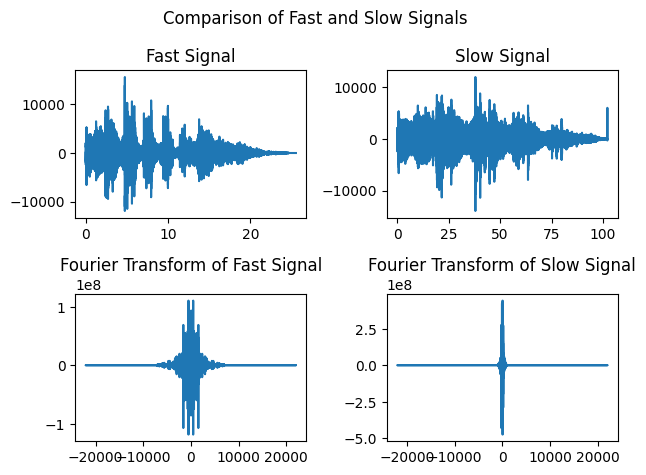

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Comparison of Fast and Slow Signals')
ax1.plot(time[:time.shape[0] // 2], fast_signal)
ax1.set_title('Fast Signal')
ax2.plot(np.linspace(0, slow_signal.shape[0] / sample_rate, slow_signal.shape[0]), slow_signal)
ax2.set_title('Slow Signal')
ax3.plot(freq, fast_fourier.real)
ax3.set_title('Fourier Transform of Fast Signal')
ax4.plot(slow_freq, slow_fourier.real)
ax4.set_title('Fourier Transform of Slow Signal')
fig.tight_layout()

## Spectrogram

### Plot the 2D-spectrogram

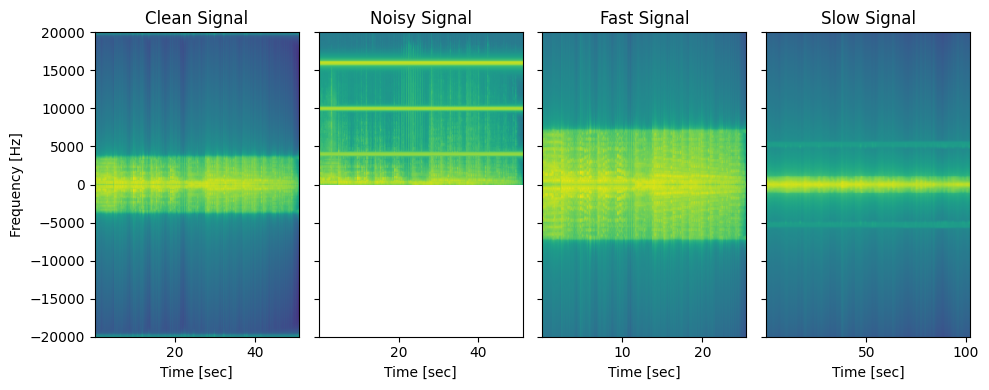

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 4))
_, _, _, im1 = ax1.specgram(clean_signal, Fs=sample_rate)
_, _, _, im2 = ax2.specgram(data, Fs=sample_rate)
_, _, _, im3 = ax3.specgram(fast_signal, Fs=sample_rate)
_, _, _, im4 = ax4.specgram(slow_signal, Fs=sample_rate)
ax1.set_title('Clean Signal')
ax2.set_title('Noisy Signal')
ax3.set_title('Fast Signal')
ax4.set_title('Slow Signal')
for ax in fig.get_axes():
    ax.set_ylim(-20000, 20000)
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    ax.label_outer()
fig.tight_layout()

### Plot the 3D-spectrogram

## Write Signal to File

In [ ]:
scipy.io.wavfile.write('clean.wav', sample_rate, clean_signal.astype(np.int16))
scipy.io.wavfile.write('fast.wav', sample_rate, fast_signal.astype(np.int16))
scipy.io.wavfile.write('slow.wav', sample_rate, slow_signal.astype(np.int16))